In [60]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
ccm_analytics= pd.read_csv('CCM_Analytics.csv')
ccm_analytics.head()

,DateOfGame,Opponent,TotalPoint,FirstHalfPoint,SecondHalfPoint,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,FreeThrowsMadeSecondHalf,FreeThrowsAttemptedTotal,...,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOffScreen-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOffScreen-PointPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarde -PointPerAttemptTotal,Assists,KaukaunaPointsScored,WinOrLoss
0,1/19/2021,GB SouthWest,26,11,15,2,2,2,2,4,...,1.333333,1.333333333,2,1.60,2,3.000000,0.857143,6,93,Win
1,1/22/2021,Hortonville,8,7,1,2,2,2,1,4,...,0.428571,#DIV/0!,0,0.50,#DIV/0!,1.500000,0.000000,7,96,Win
2,1/23/2021,Appleton West,25,15,10,0,0,3,2,3,...,1.615385,#DIV/0!,#DIV/0!,0.50,#DIV/0!,1.714286,1.285714,11,99,Win
3,12/8/2020,Appleton East,40,10,30,2,2,13,13,15,...,0.600000,1,2,1.25,1.5,0.000000,1.000000,6,86,Win


In [63]:
ccm_analytics.isna().sum()

DateOfGame                                        0
Opponent                                          0
TotalPoint                                        0
FirstHalfPoint                                    0
SecondHalfPoint                                   0
FreeThrowsAttemptedFirstHalf                      0
FreeThrowsMadeFirstHalf                           0
FreeThrowsAttemptedSecondHalf                     0
FreeThrowsMadeSecondHalf                          0
FreeThrowsAttemptedTotal                          0
FreeThrowsMadeTotal                               0
FieldGoalsAttemptedTotal                          0
FieldGoalsMadeTotal                               0
2PointFieldGoalsAttemptedTotal                    0
2PointFieldGoalsMadeTotal                         0
3PointFieldGoalsAttemptedTotal                    0
3PointFieldGoalsMadeTotal                         0
FieldGoalsAttemptedOffScreenTotal                 0
FieldGoalsMadeOffScreenTotal                      0
FieldGoalsAt

In [64]:
ccm_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   DateOfGame                                      4 non-null      object 
 1   Opponent                                        4 non-null      object 
 2   TotalPoint                                      4 non-null      int64  
 3   FirstHalfPoint                                  4 non-null      int64  
 4   SecondHalfPoint                                 4 non-null      int64  
 5   FreeThrowsAttemptedFirstHalf                    4 non-null      int64  
 6   FreeThrowsMadeFirstHalf                         4 non-null      int64  
 7   FreeThrowsAttemptedSecondHalf                   4 non-null      int64  
 8   FreeThrowsMadeSecondHalf                        4 non-null      int64  
 9   FreeThrowsAttemptedTotal                       

In [65]:
#Replace #DIV/0! error with 0
ccm_analytics = ccm_analytics.replace('#DIV/0!', 0)

In [66]:
ccm_analytics.describe().columns

Index(['TotalPoint', 'FirstHalfPoint', 'SecondHalfPoint',
       'FreeThrowsAttemptedFirstHalf', 'FreeThrowsMadeFirstHalf',
       'FreeThrowsAttemptedSecondHalf', 'FreeThrowsMadeSecondHalf',
       'FreeThrowsAttemptedTotal', 'FreeThrowsMadeTotal',
       'FieldGoalsAttemptedTotal', 'FieldGoalsMadeTotal',
       '2PointFieldGoalsAttemptedTotal', '2PointFieldGoalsMadeTotal',
       '3PointFieldGoalsAttemptedTotal', '3PointFieldGoalsMadeTotal',
       'FieldGoalsAttemptedOffScreenTotal', 'FieldGoalsMadeOffScreenTotal ',
       'FieldGoalsAttemptedOpenTotal', 'FieldGoalsMadeOpenTotal',
       'FieldGoalsAttemptedGuardedTotal', 'FieldGoalsMadeGuardedTotal',
       '2PointFieldGoalsAttemptedOffScreenFirstHalf',
       '2PointFieldGoalsMadeOffScreenFirstHalf',
       '2PointFieldGoalsAttemptedOpenTotal', '2PointFieldGoalsMadeOpenTotal',
       '2PointFieldGoalsAttemptedGuardedTotal',
       '2PointFieldGoalsMadeGuardedTotal ',
       '3PointFieldGoalsAttemptedOffScreenTotal',
       '3Point

In [67]:
#Seperate Numerical and Categorical data
df_num = ccm_analytics.drop(columns = ['DateOfGame', 'Opponent', 'WinOrLoss'])
df_num

,TotalPoint,FirstHalfPoint,SecondHalfPoint,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,FreeThrowsMadeSecondHalf,FreeThrowsAttemptedTotal,FreeThrowsMadeTotal,FieldGoalsAttemptedTotal,...,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOffScreen-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOffScreen-PointPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarde -PointPerAttemptTotal,Assists,KaukaunaPointsScored
0,26,11,15,2,2,2,2,4,4,15,...,1.666667,1.333333,1.333333333,2,1.60,2,3.000000,0.857143,6,93
1,8,7,1,2,2,2,1,4,3,12,...,0.400000,0.428571,0,0,0.50,0,1.500000,0.000000,7,96
2,25,15,10,0,0,3,2,3,2,17,...,0.500000,1.615385,0,0,0.50,0,1.714286,1.285714,11,99
3,40,10,30,2,2,13,13,15,15,22,...,1.294118,0.600000,1,2,1.25,1.5,0.000000,1.000000,6,86


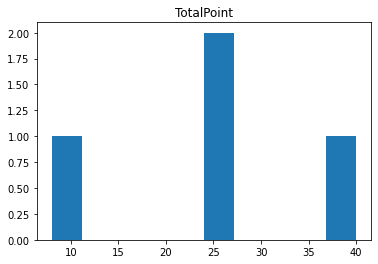

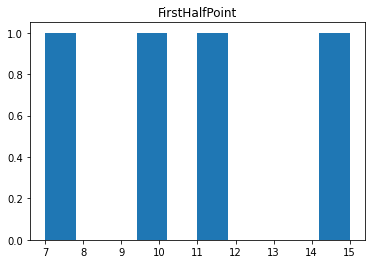

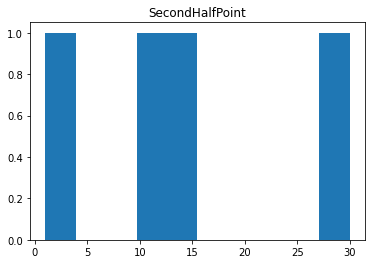

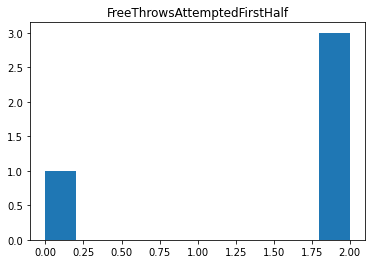

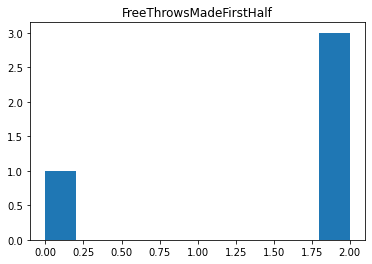

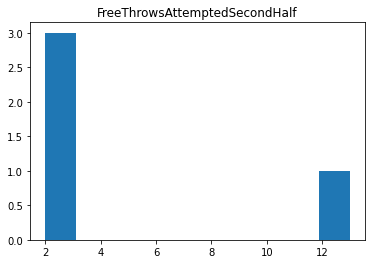

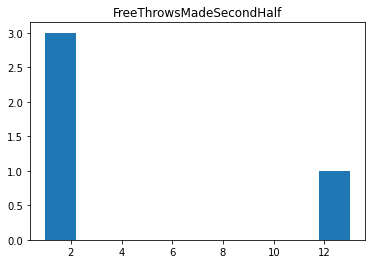

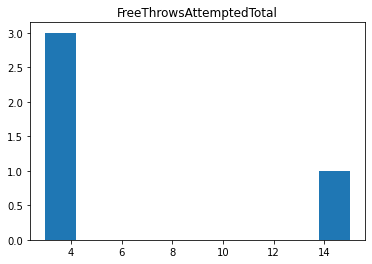

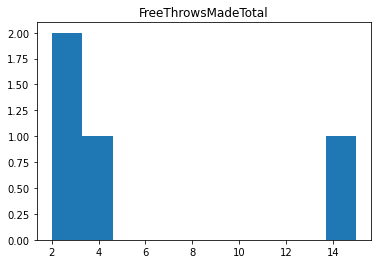

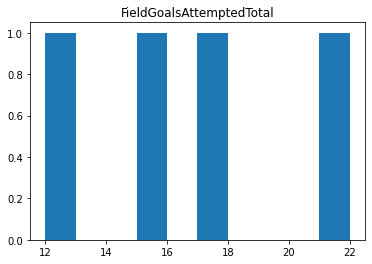

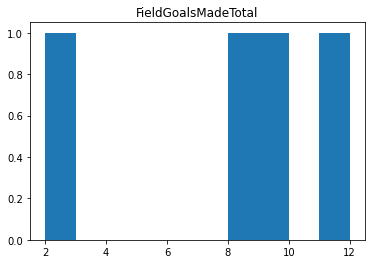

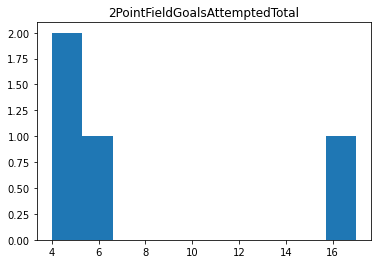

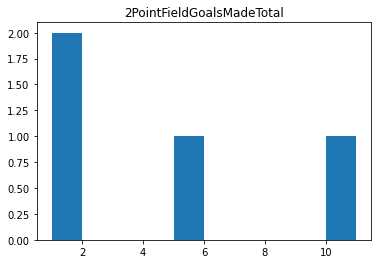

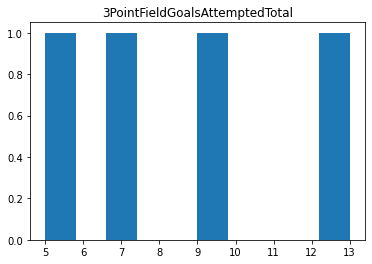

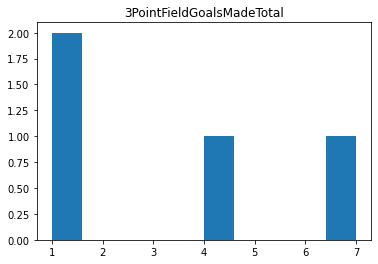

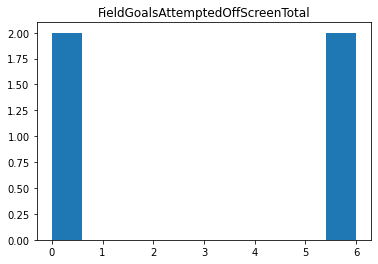

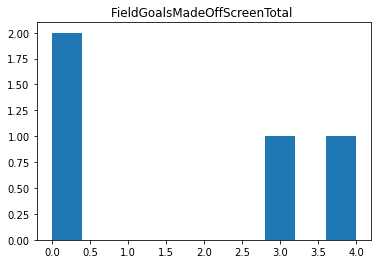

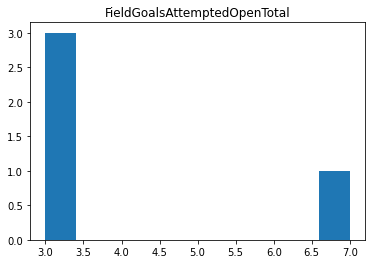

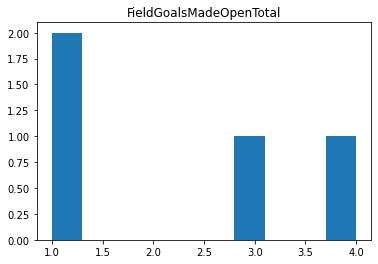

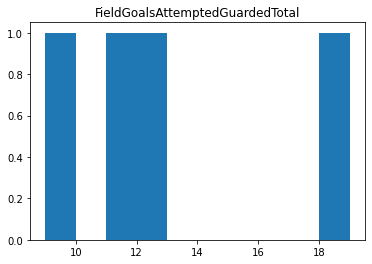

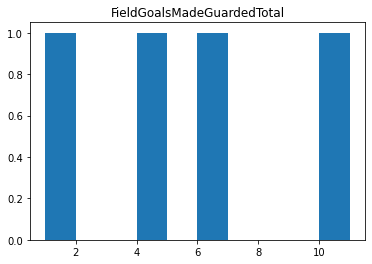

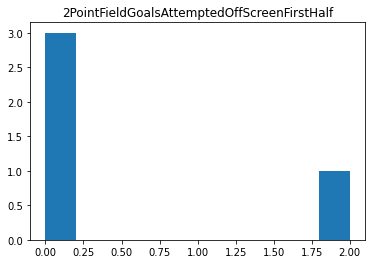

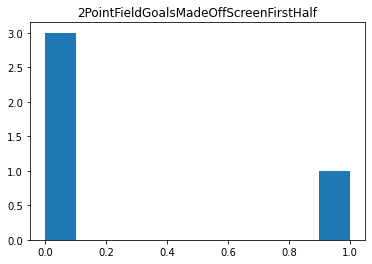

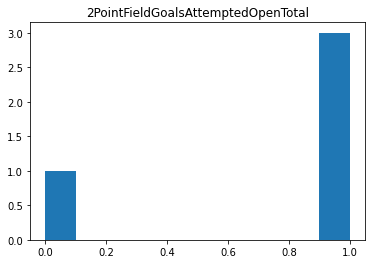

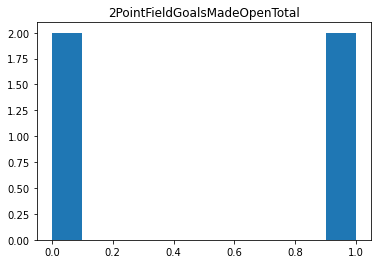

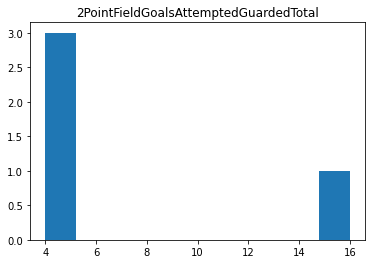

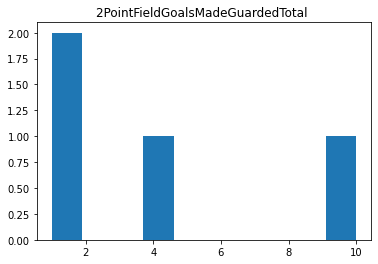

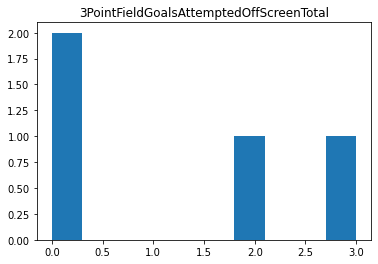

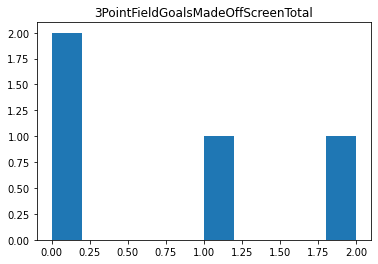

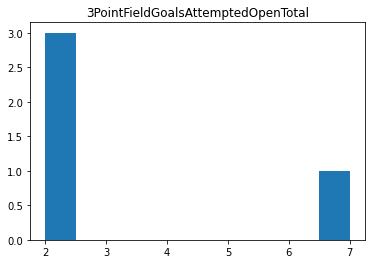

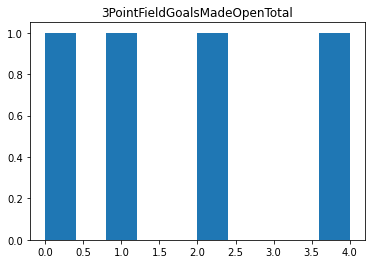

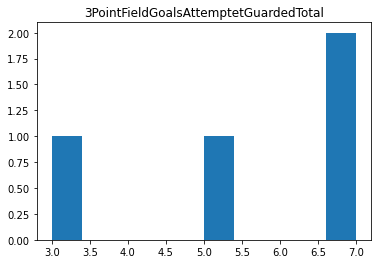

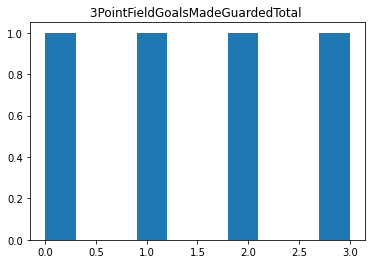

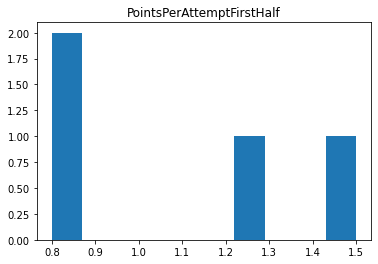

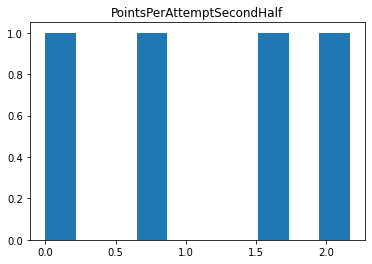

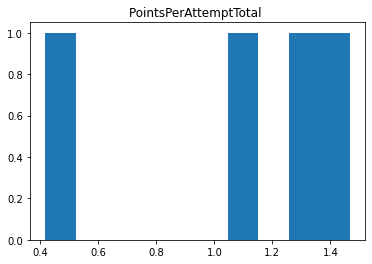

TypeError: 'value' must be an instance of str or bytes, not a int

In [68]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

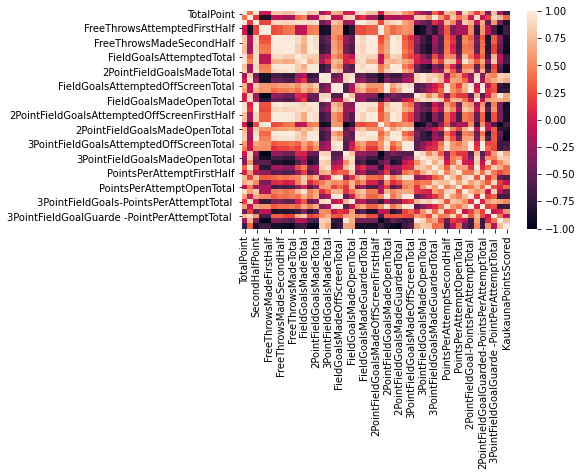

In [69]:
#Heat map correlations
shooting_correlation = df_num.corr()
sns.heatmap(shooting_correlation)

In [75]:
#Find correlations
shooting_correlation

,TotalPoint,FirstHalfPoint,SecondHalfPoint,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,FreeThrowsMadeSecondHalf,FreeThrowsAttemptedTotal,FreeThrowsMadeTotal,FieldGoalsAttemptedTotal,...,PointsPerAttemptTotal,PointsPerAttemptOpenTotal,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarde -PointPerAttemptTotal,Assists,KaukaunaPointsScored
TotalPoint,1.000000,0.406274,0.968574,-0.012724,-0.012724,0.798476,0.825681,0.749602,0.773256,0.953552,...,0.676040,-0.081106,0.908315,0.630349,0.180310,0.589767,-0.433561,0.765458,-0.165695,-0.710707
FirstHalfPoint,0.406274,1.000000,0.166231,-0.857537,-0.857537,-0.075371,-0.079840,-0.221778,-0.216591,0.348036,...,0.792350,0.421947,0.613166,0.011653,0.909324,-0.052466,0.197824,0.898684,0.741665,0.353336
SecondHalfPoint,0.968574,0.166231,1.000000,0.219694,0.219694,0.882202,0.912777,0.869312,0.893426,0.934301,...,0.513877,-0.202382,0.813314,0.677077,-0.052938,0.650736,-0.521731,0.581429,-0.380696,-0.863148
FreeThrowsAttemptedFirstHalf,-0.012724,-0.857537,0.219694,1.000000,1.000000,0.249029,0.293105,0.410347,0.440386,-0.079305,...,-0.367432,-0.152413,-0.144898,0.503960,-0.725826,0.557733,-0.087149,-0.602464,-0.980196,-0.658553
FreeThrowsMadeFirstHalf,-0.012724,-0.857537,0.219694,1.000000,1.000000,0.249029,0.293105,0.410347,0.440386,-0.079305,...,-0.367432,-0.152413,-0.144898,0.503960,-0.725826,0.557733,-0.087149,-0.602464,-0.980196,-0.658553
FreeThrowsAttemptedSecondHalf,0.798476,-0.075371,0.882202,0.249029,0.249029,1.000000,0.996337,0.985388,0.976738,0.903530,...,0.097085,-0.639657,0.475278,0.318976,-0.405612,0.304060,-0.857254,0.321495,-0.339993,-0.860994
FreeThrowsMadeSecondHalf,0.825681,-0.079840,0.912777,0.293105,0.293105,0.996337,1.000000,0.989691,0.987456,0.906545,...,0.143241,-0.581800,0.520989,0.398499,-0.387606,0.384386,-0.812293,0.332990,-0.394012,-0.894935
FreeThrowsAttemptedTotal,0.749602,-0.221778,0.869312,0.410347,0.410347,0.985388,0.989691,1.000000,0.997137,0.836811,...,0.026797,-0.629100,0.422036,0.388973,-0.509568,0.384386,-0.822511,0.196767,-0.492515,-0.926521
FreeThrowsMadeTotal,0.773256,-0.216591,0.893426,0.440386,0.440386,0.976738,0.987456,0.997137,1.000000,0.838196,...,0.073831,-0.571510,0.465307,0.457438,-0.483848,0.453064,-0.777177,0.213201,-0.531872,-0.949147
FieldGoalsAttemptedTotal,0.953552,0.348036,0.934301,-0.079305,-0.079305,0.903530,0.906545,0.836811,0.838196,1.000000,...,0.479766,-0.356214,0.758666,0.395329,0.024902,0.355044,-0.670402,0.696201,-0.066630,-0.697938
